# Plot initialisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # for plots
from matplotlib import rc
import seaborn as sns
sns.set_style("white")

dirname = "srcimages/"
imageformat = '.pdf'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'text.fontsize': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)
mc3my_brown = (0.64, 0.16, 0.16)
purple = (148. / 255, 0, 211. / 255)
plt.close("all")

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Empirical mean:

/usr/lib/pymodules/python2.7/matplotlib/cbook.py:122: MatplotlibDeprecationWarning: The faceted option was deprecated in version 1.2. Use edgecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


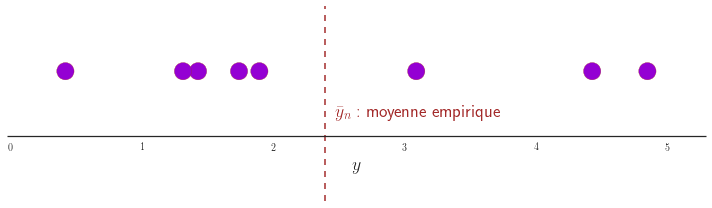

In [3]:
mu = 1.5
sigma = 4
nb_samples = 8

np.random.seed(seed=2)
rgamma = np.random.gamma
# get random nb_samples observations from a gamma law
X = rgamma(mu, sigma, nb_samples)
y = np.ones(nb_samples,)

# Various statistics:
meanX = np.mean(X)
minX = np.min(X)
maxX = np.max(X)
medX = np.median(X)
# Median absolute deviation (médiane des écarts à la médiane) pour la série X
MADX = np.median(np.abs(X - medX))
# Standard deviation i.e. écart type pour la série X
s = np.std(X)

# Création d'une figure
fig1, ax = plt.subplots(figsize=(10, 3))
# limitation de la figure à l'intervalle [0,1.5] sur l'axe vertical
ax.set_ylim(0, 1.5)
# limitation de la figure à l'intervalle [minX-10%(maxX-minX),maxX+10%(maxX-minX)]
# pour s'assurer que tous les points puissent être affichés
# np.ptp(X) ==> peak to peak (sommet à sommet) sur une série retourne maxX-minX
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
# retirer les ticks par défaut sur l'axe horizontal
ax.get_xaxis().tick_bottom()
# pas d'axe vertical
ax.axes.get_yaxis().set_visible(False)

# Rendre invisible les bords right, top & left de la figure
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
# Relever le bord bottom de la figure à la hauteur 0.5
ax.spines['bottom'].set_position(('data', 0.5))

# Dessiner les points (x_i,y_i) i=1..8 (rem: y_i=1 pour tout i)
# points sous forme de cercles (marker='o') intérieur noir, contour mc3my_brown,
# Je pense que c=purple ne sert pas
# faceted = True ???
ax.scatter(X, y, s=300, c=purple, edgecolors=mc3my_brown,
           marker='o', faceted=True)

# Dessiner une ligne verticale en pointillés (linestyle="--") à l'endroit de
# la moyenne des X
ax.plot([meanX, meanX], [0, 1.5], color=mc3my_brown,
        linewidth=1.5, linestyle="--")

# afficher "y" comme label de l'axe horizontal
plt.xlabel(r'$y$', fontsize=18)

# Créer l'annotation ybarre_n : moyenne empirique à 0.4 de la ligne en pointillés
plt.annotate(r'$\bar{y}_n : \mbox{moyenne empirique}$',
             xy=(meanX, 0.4), xycoords='data', xytext=(+10, +30),
             textcoords='offset points', fontsize=18, color =mc3my_brown)

# Pour s'assurer que toutes les informations seront bien en totalité
# dans le cadre intérieur de la figure
plt.tight_layout()

## Empirical mean / median

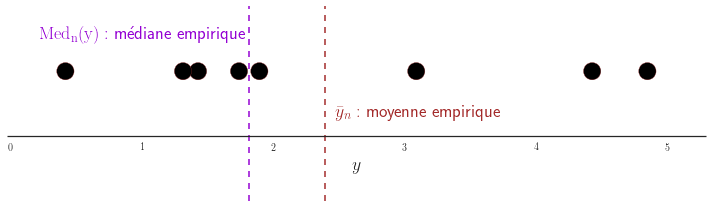

In [4]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, color='black', s=300, c=purple, edgecolors=mc3my_brown,
           marker='o', faceted=True)
ax.plot([meanX, meanX], [0, 1.5], color=mc3my_brown, linewidth=1.5,
        linestyle="--")
ax.plot([medX, medX], [0, 1.5], color=purple, linewidth=1.5, linestyle="--")

plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\rm{Med}_n(\mathbb{y}): \mbox{m\'ediane empirique}$',
             xy=(medX, 1), xycoords='data', xytext=(-210, +30),
             textcoords='offset points', fontsize=18, color =purple)
plt.annotate(r'$\bar{y}_n : \mbox{moyenne empirique}$', xy=(meanX, 0.4),
             xycoords='data', xytext=(+10, +30), textcoords='offset points',
             fontsize=18, color =mc3my_brown)

plt.tight_layout()

## Standard deviation (écart type de la série):

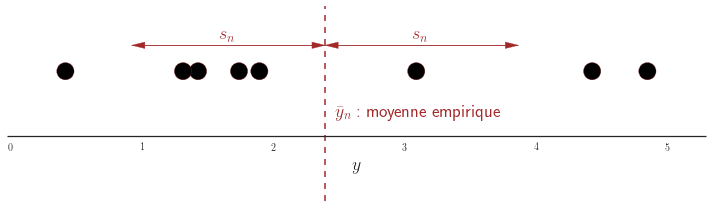

In [5]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, color='black', s=300, c=purple, edgecolors=mc3my_brown,
           marker='o', faceted=True)

ax.plot([meanX, meanX], [0, 1.5], color=mc3my_brown, linewidth=1.5,
        linestyle="--")
plt.arrow(meanX, 1.2, -s, 0, fc=mc3my_brown, ec=mc3my_brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX - s, 1.2, s, 0, fc=mc3my_brown, ec=mc3my_brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX, 1.2, s, 0, fc=mc3my_brown, ec=mc3my_brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX + s, 1.2, -s, 0, fc=mc3my_brown, ec=mc3my_brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)


plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\bar{y}_n : \mbox{moyenne empirique}$',
             xy=(meanX, 0.4), xycoords='data', xytext=(+10, +30),
             textcoords='offset points', fontsize=18, color =mc3my_brown)
plt.annotate(r'$s_n$', xy=(meanX + s * (0.4), 1), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=18,
             color = mc3my_brown)
plt.annotate(r'$s_n$', xy=(meanX - s * (0.6), 1), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=18,
             color =mc3my_brown)

plt.tight_layout()

## MAD (measures of dispersion) :

MAD est un acronyme pouvant correspondre à plusieurs mesures de dispersion sur un échantillon.<br>
Il peut s'agir de :<br>
<ul>
<li>
la moyenne des écarts à la moyenne (<b>Mean Absolute Deviation</b>)
</li>
<li>
la moyenne des écarts à la médiane autour de la médiane (<b>Mean Absolute Deviation</b> around median)
</li>
<li>
la médiane des écarts à la médiane autour de la médiane (<b>Median Absolute Deviation</b> around median)
</li>
</ul>
<br>
Le dernier des trois est celui qui présente la meilleure robustesse comme estimateur de dispersion (voir shéma ci-dessous).

In [6]:
from IPython.display import display, Math, Latex
display(Math(r'Mean\ Absolute\ Deviation\ around\ mean = \frac{1}{n}\sum_{i=1}^{n}\left | x_i-\bar{x} \right |'))
display(Math(r'Mean\ Absolute\ Deviation\ around\ median = \frac{1}{n}\sum_{i=1}^{n}\left | x_i-median(X) \right |'))
display(Math(r'Median\ Absolute\ Deviation\ around\ median = Median(\left | x_i-median(X) \right |)'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

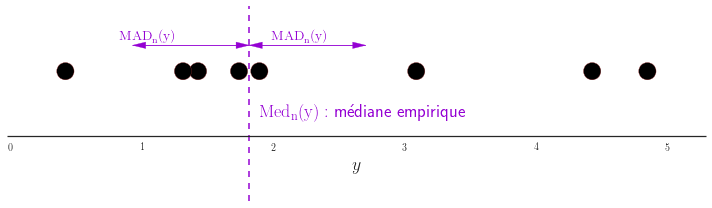

In [7]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, color='black', s=300, c=purple, edgecolors=mc3my_brown,
           marker='o', faceted=True)

ax.plot([medX, medX], [0, 1.5], color=purple, linewidth=1.5, linestyle="--")

plt.arrow(medX, 1.2, -MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX - MADX, 1.2, MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX, 1.2, MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX + MADX, 1.2, -MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)

plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\rm{Med}_n(\mathbb{y}): \mbox{m\'ediane empirique}$',
             xy=(medX, 0.4), xycoords='data', xytext=(+10, +30),
             textcoords='offset points', fontsize=18, color=purple)
plt.annotate(r'$\rm{MAD}_n(\mathbb{y})$', xy=(medX + MADX * (0.1), 1),
             xycoords='data', xytext=(+10, +30), textcoords='offset points',
             fontsize=14, color =purple)
plt.annotate(r'$\rm{MAD}_n(\mathbb{y})$', xy=(medX - MADX * (1.2), 1),
             xycoords='data', xytext=(+10, +30), textcoords='offset points',
             fontsize=14, color =purple)

plt.tight_layout()

## Histogram

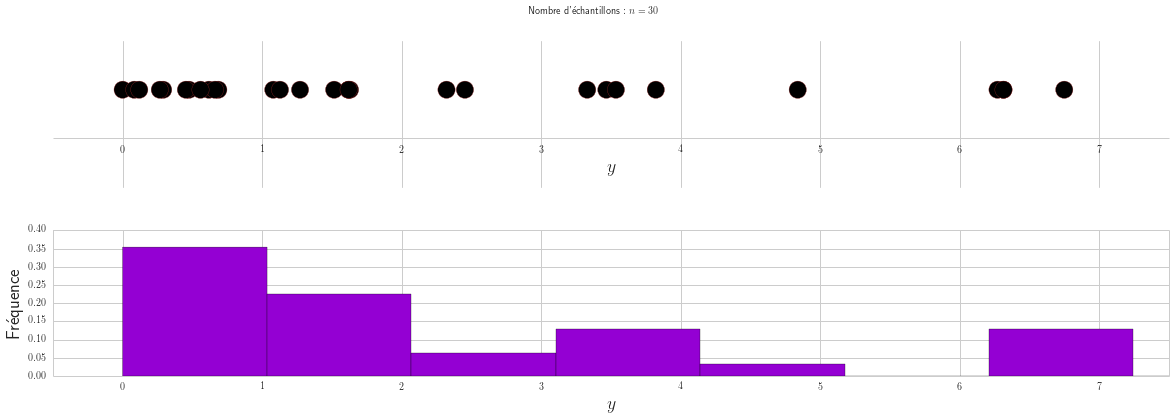

In [50]:
sns.set_style("whitegrid")
mu = 1
sigma = 3
nb_samples = 30

np.random.seed(seed=1)
rgamma = np.random.gamma
X = rgamma(mu, sigma, nb_samples)
y = np.ones(nb_samples,)
# Statistics:
meanX = np.mean(X)
minX = np.min(X)
maxX = np.max(X)
medX = np.median(X)
MADX = np.median(np.abs(X - medX))
s = np.std(X)
sorted_data = np.sort(X)

fig1 = plt.figure(figsize=(20, 6))
# Espace de 0.3 entre 2 graphiques dans la figure
plt.subplots_adjust(hspace=0.3)
# 211 signification :
# Définir la disposition de la figure en 2 lignes et 1 colonne et travailler sur le 1er graphique
ax = fig1.add_subplot(211)
ax.set_ylim(0, 1.5)
range_lim = (-0.5, 7.5)  # 0, X.max()+0.3
ax.set_xlim(range_lim)
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, color='black', s=300, c=purple, edgecolors=mc3my_brown,
           marker='o', faceted=True)
plt.xlabel(r'$y$', fontsize=18)
plt.suptitle(r"$\mbox{Nombre d'\'echantillons}" + ":n={0}$".format(nb_samples),
             multialignment='center')

# 211 signification :
# Définir la disposition de la figure en 2 lignes et 1 colonne et travailler sur le 2ème graphique
ax2 = fig1.add_subplot(212)
ax2.set_xlim(range_lim)
plt.hist(X, bins=10, normed=True, align='mid', color=purple)
plt.ylabel(r'$\mbox{Fr\'equence}$', fontsize=18)
plt.xlabel(r'$y$', fontsize=18)


## KDE : Kernel Density Estimation

see : https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/ for more explanation<br>
Il s'agit d'appliquer une méthode d'interpolation pour trouver une fonction qui est un bon estimateur de la loi de densité de probabibilité (inconnue) que suit un échantillon statistique donné.<br>
La méthode consiste à sommer des gaussiennes dont chacune est une approximation de chaque barre de l'histogramme :<br>
cf : https://fr.wikipedia.org/wiki/Estimation_par_noyau

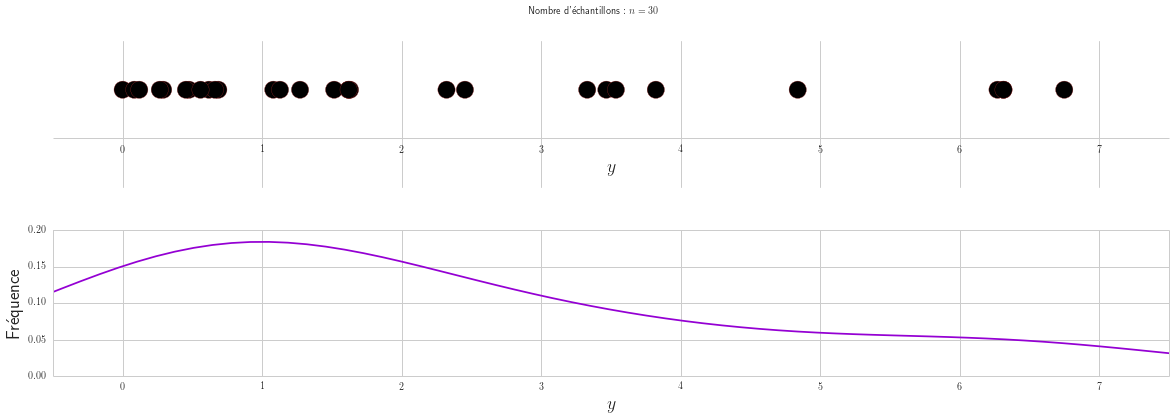

In [11]:
fig1 = plt.figure(figsize=(20, 6))
plt.subplots_adjust(hspace=0.3)
ax = fig1.add_subplot(211)
ax.set_ylim(0, 1.5)
range_lim = (-0.5, 7.5)  # 0, X.max()+0.3
ax.set_xlim(range_lim)
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, color='black', s=300, c=purple, edgecolors=mc3my_brown,
           marker='o', faceted=True)
plt.xlabel(r'$y$', fontsize=18)
plt.suptitle(r"$\mbox{Nombre d'\'echantillons}" + ":n={0}$".format(nb_samples),
             multialignment='center')

ax2 = fig1.add_subplot(212)
ax2.set_xlim(range_lim)
# en un seul appel seaborn permet de calculer et de tracer la KDE
sns.kdeplot(X, color=purple)
plt.ylabel(r'$\mbox{Fr\'equence}$', fontsize=18)
plt.xlabel(r'$y$', fontsize=18)

## CDF : Cumulative Distribution Function

En français : <b>fonction de répartition</b> associée à une loi de probabilité<br>
CFD(X) = P(X<=x)

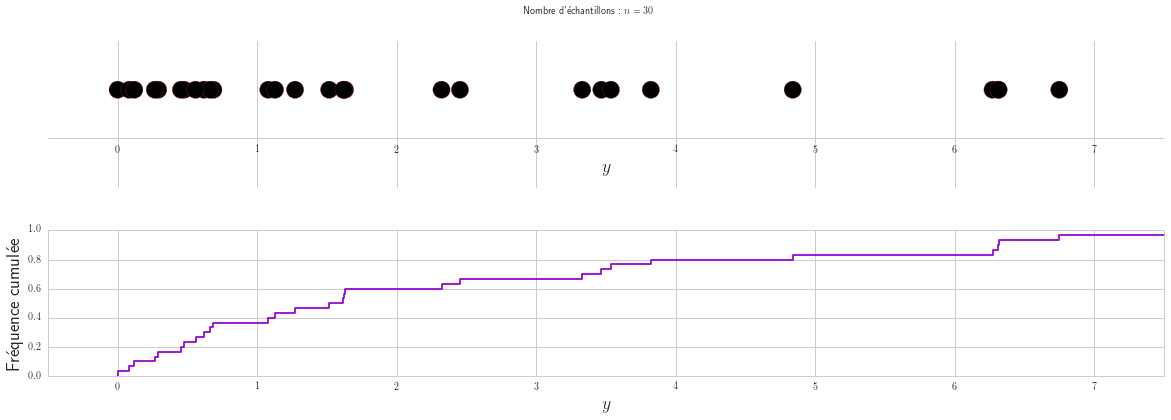

In [12]:
fig1 = plt.figure(figsize=(20, 6))
plt.subplots_adjust(hspace=0.3)
ax = fig1.add_subplot(211)
ax.set_ylim(0, 1.5)
ax.set_xlim(range_lim)
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, color='black', s=300, c=purple, edgecolors=mc3my_brown,
           marker='o', faceted=True)
plt.xlabel(r'$y$', fontsize=18)
plt.suptitle(r"$\mbox{Nombre d'\'echantillons}" + ":n={0}$".format(nb_samples),
             multialignment='center')

ax2 = fig1.add_subplot(212)
ax2.set_xlim(range_lim)
plt.step(sorted_data, np.arange(sorted_data.size, dtype='float') / nb_samples,
         color=purple)
# plt.hist(X,bins=200,cumulative=True, normed=True,range=range_lim,
#    histtype='step',align='right')
plt.ylabel(r'$\mbox{Fr\'equence cumul\'ee}$', fontsize=18)
plt.xlabel(r'$y$', fontsize=18)

## Quantile

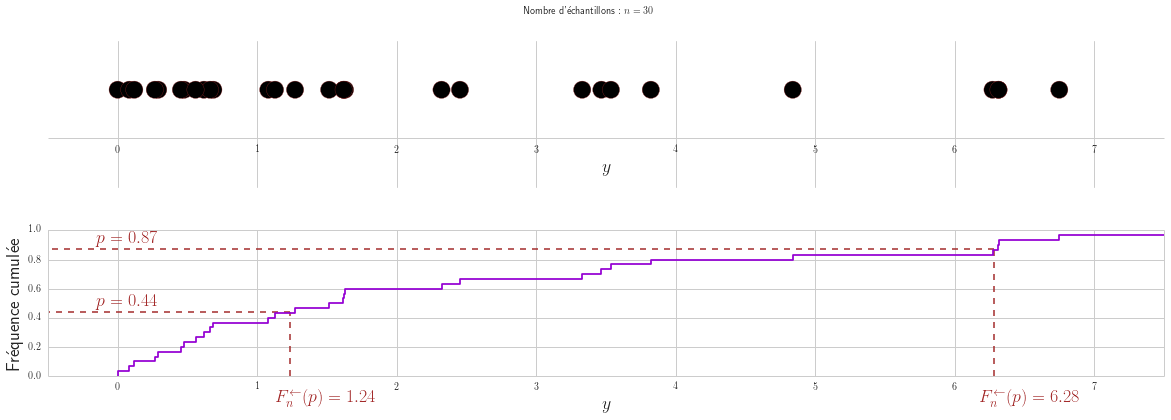

In [13]:
fig1 = plt.figure(figsize=(20, 6))
plt.subplots_adjust(hspace=0.3)
ax = fig1.add_subplot(211)
ax.set_ylim(0, 1.5)
ax.set_xlim(range_lim)
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, color='black', s=300, c=purple, edgecolors=mc3my_brown,
           marker='o', faceted=True)
plt.xlabel(r'$y$', fontsize=18)
plt.suptitle(r"$\mbox{Nombre d'\'echantillons}" + ":n={0}$".format(nb_samples),
             multialignment='center')

ax2 = fig1.add_subplot(212)
ax2.set_xlim(range_lim)

##############
# First case
p = 0.44
q = np.percentile(X, p * 100)

ax2.plot([q, range_lim[0]], [p, p], color=mc3my_brown, linewidth=1.5,
         linestyle="--")
ax2.plot([q, q], [0, p], color=mc3my_brown, linewidth=1.5, linestyle="--")
ax2.annotate(r'$p=%.2f$' % p, xy=(0, p), xycoords='data', xytext=(-23, +6),
             textcoords='offset points', fontsize=18, color = mc3my_brown)
ax2.annotate(r'$F_n^\leftarrow(p)=%.2f$' % q, xy=(q, 0), xycoords='data',
             xytext= (-15, -30), textcoords='offset points', fontsize=18,
             color = mc3my_brown)

##############
# Second case
p = 0.87
q = np.percentile(X, p * 100)

ax2.plot([q, range_lim[0]], [p, p], color=mc3my_brown, linewidth=1.5,
         linestyle="--")
ax2.plot([q, q], [0, p], color=mc3my_brown, linewidth=1.5, linestyle="--")
ax2.annotate(r'$p=%.2f$' % p, xy=(0, p), xycoords='data', xytext=(-23, +6),
             textcoords='offset points', fontsize=18, color = mc3my_brown)
ax2.annotate(r'$F_n^\leftarrow(p)=%.2f$' % q, xy=(q, 0), xycoords='data',
             xytext= (-15, -30), textcoords='offset points',
             fontsize=18, color=mc3my_brown)

plt.step(sorted_data, np.arange(sorted_data.size, dtype='float') / nb_samples,
         color=purple)
plt.ylabel(r'$\mbox{Fr\'equence cumul\'ee}$', fontsize=18)
plt.xlabel(r'$y$', fontsize=18)

<b>Interprétation :</b><br>
<ul>
<li>
44% de la population se répartit en dessous de 1.24
</li>
<li>
87% de la population se répartit en dessous de 6.28
</li>
</ul>

## Correlations figures

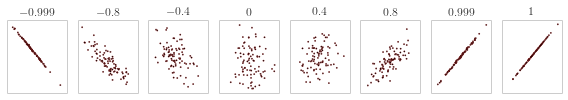

In [60]:
# Initialisation du generateur de valeurs aléatoires
rng = np.random.RandomState(42)     # initializing randomness 
n_samples = 90
sig_list = [-0.999, -0.8, -.4, 0, 0.4, 0.8, 0.999]
nb_sig = len(sig_list)

fig1 = plt.figure(figsize=(nb_sig, 1.5))
for i in range(nb_sig):
    # construction d'une matrice de covariance 2D
    # avec des covariances dans sig_list
    MySigma = np.eye(2, 2) + np.array([[0, sig_list[i - 1]],
                                      [sig_list[i - 1], 0]])
    # Générer 90 points autour de (0,0) en respectant la covariance mySigma
    X = rng.multivariate_normal(np.array([0, 0]), MySigma, n_samples)
    ax = fig1.add_subplot(1, nb_sig, i)
    plt.title(r" ${0}$".format(sig_list[i - 1]))
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.scatter(X[:, 0], X[:, 1], color='black', s=2, c=purple,
               edgecolors=mc3my_brown, marker='o', faceted=True)
plt.tight_layout()

## Correlations figures : negative case

In [70]:
from IPython.display import display, Math, Latex
display(Math(r'D=\begin{pmatrix} 1 & 0\\0  & 0 \end{pmatrix}\ \ et\ \ P=\begin{pmatrix}cos(\theta ) & sin(\theta )\\-sin(\theta )  & cos(\theta )\end{pmatrix}'))
display(Math(r'\Sigma = P.D.P^{T}=\begin{pmatrix} cos^{2}\theta  & -cos\theta\sin\theta \\ -cos\theta\sin\theta\ & sin^{2}\theta \end{pmatrix} '))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A partir d'une telle matrice de covariance, on obtient toujours des distributions parfaitement corrélées.<br>
En effet:

In [77]:
from IPython.display import display, Math, Latex
display(Math(r'\forall\ \theta,\ on\ a\ :\ corr_{xy} = \frac{Cov(x,y)}{\sigma(x)*\sigma(y)} = \frac{-cos\theta\sin\theta}{cos\theta\sin\theta}=-1'))

<IPython.core.display.Math object>

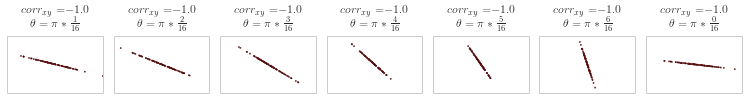

In [121]:
rng = np.random.RandomState(42)
n_samples = 90
theta_list = [np.pi * 1 / 16, np.pi * 2 / 16,
              np.pi * 3 / 16, np.pi * 4 / 16, np.pi * 5 / 16,
              np.pi * 6 / 16, np.pi * 7 / 16]
nb_theta = len(theta_list)

fig1 = plt.figure(figsize=(nb_theta*1.5, (1.5)))
D = np.diag([1, 0])

for i in range(nb_theta):
    theta = theta_list[i]
    P = np.array([[np.cos(theta), np.sin(theta)],
                 [-np.sin(theta), np.cos(theta)]])
    MySigma = np.dot(np.dot(P, D), np.transpose(P))
    X = rng.multivariate_normal(np.array([0, 0]), MySigma, n_samples)
    ax = fig1.add_subplot(1, nb_theta, i)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.scatter(X[:, 0], X[:, 1], color='black', s=2, c=purple,
               edgecolors=mc3my_brown, marker='o', faceted=True)
    ax.set_ylim(-3, 3)
    ax.set_xlim(-3, 3)
    corr_mat = np.corrcoef(X[:, 0], X[:, 1])
    corr_mat[0, 1]
    plt.title(r"$corr_{xy}=$"+r"${0}$".format(corr_mat[0, 1])+"\n"+r"$\theta=\pi*\frac{%d}{16}$" %i)

plt.tight_layout()

## Zero correlation Example : Gaussian Mixtures

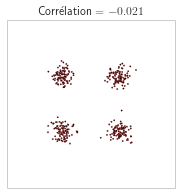

In [109]:
rng = np.random.RandomState(42)
n_samples = 100

fig1, ax = plt.subplots(figsize=(3, 3))
MySigma = 0.01 * np.eye(2, 2)
X1 = rng.multivariate_normal(np.array([0, 1]), MySigma, n_samples)
X2 = rng.multivariate_normal(np.array([1, 0]), MySigma, n_samples)
X3 = rng.multivariate_normal(np.array([1, 1]), MySigma, n_samples)
X4 = rng.multivariate_normal(np.array([0, 0]), MySigma, n_samples)
Z = np.vstack((X1, X2))
Y = np.vstack((X3, X4))
X = np.vstack((Z, Y))
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.scatter(X[:, 0], X[:, 1], color='black', s=2, c=purple,
           edgecolors=mc3my_brown, marker='o', faceted=True)
ax.set_ylim(-1, 2)
ax.set_xlim(-1, 2)
corr_mat = np.corrcoef(X[:, 0], X[:, 1])
debut_titre = r"$\mbox{Corr\'elation }$"
plt.title(debut_titre + r"$ = %.3f$" % corr_mat[0, 1])


## Zero correlation Example : Circle

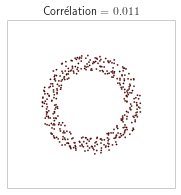

In [115]:
rng = np.random.RandomState(42)
n_samples = 400

fig1, ax = plt.subplots(figsize=(3, 3))
MySigma = 0.01 * np.eye(2, 2)
r = 0.8 + 0.4 * rng.rand(1, n_samples)
thetas = 2 * np.pi / n_samples * np.arange(n_samples)
P = np.transpose(np.array(np.vstack((np.cos(thetas), np.sin(thetas)))))

ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.scatter(np.multiply(r, P[:, 0]), r * P[:, 1], color='black', s=2,
           c=purple, edgecolors=mc3my_brown, marker='o', faceted=True)
ax.set_ylim(-2, 2)
ax.set_xlim(-2, 2)
corr_mat = np.corrcoef(r * P[:, 0], r * P[:, 1])
debut_titre = r"$\mbox{Corr\'elation }$"
plt.title(debut_titre + r"$ = %.3f$" % corr_mat[0, 1])


## Zero correlation Example : square

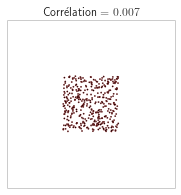

In [122]:
rng = np.random.RandomState(42)
n_samples = 400

fig1, ax = plt.subplots(figsize=(3, 3))
X1 = rng.rand(1, n_samples)
X2 = rng.rand(1, n_samples)

ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.scatter(X1, X2, color='black', s=2, c=purple, edgecolors=mc3my_brown,
           marker='o', faceted=True)
ax.set_ylim(-1, 2)
ax.set_xlim(-1, 2)
corr_mat = np.corrcoef(X1, X2)
debut_titre = r"$\mbox{Corr\'elation }$"
plt.title(debut_titre + r"$ = %.3f$" % corr_mat[0, 1])

## Scatter plot

(150, 5)


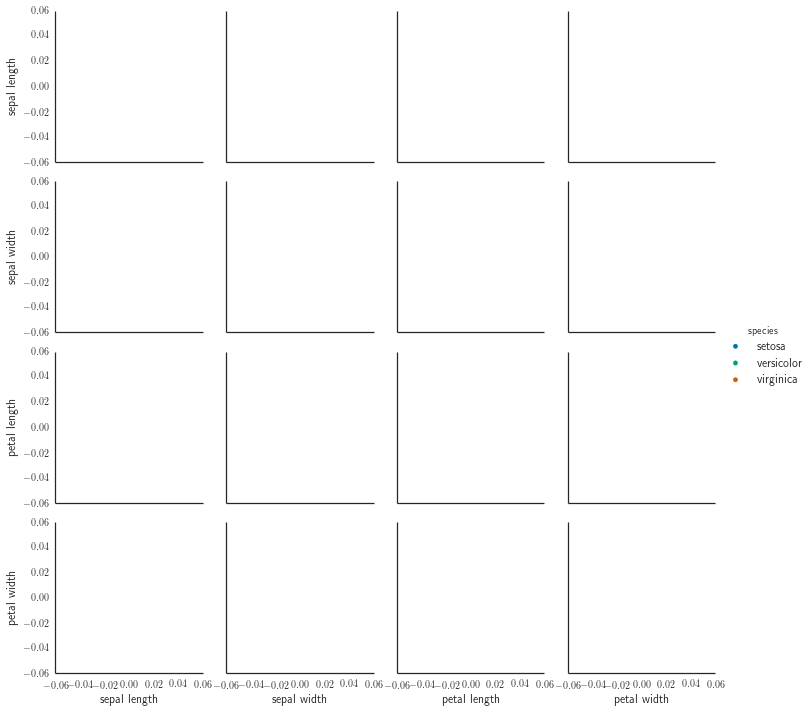

In [126]:
import pandas as pd
sns.set_style("white")
iris = sns.load_dataset("iris")
print iris.shape
# Next two line needed for avoiding underscore issues in printing with tex...
iris_df = pd.DataFrame(iris)
iris_df.columns = ['sepal length', 'sepal width', 'petal length',
                   'petal width', 'species']

g = sns.PairGrid(iris_df, hue="species", palette="colorblind")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()